In [168]:
import pandas as pd # dataframe manipulation
import numpy as np # numerical computation
import matplotlib.pyplot as plt # plotting
from mpl_toolkits.basemap import Basemap # map plotting
import scipy as sp # scientific computing

Below is the installation command that you should uncomment to install basemap in colab.  

In [169]:
### Google Colab installations
# !pip install basemap

## 1. Plotting linguistic diversity

### 1.1. Exploring the data

In this part of the practical, we are going to plot the linguistic diversity of the world. We will use the data from [Glottolog](https://glottolog.org/), a database of the world's languages. 

In [254]:
df = pd.read_csv('https://raw.githubusercontent.com/' \
                 'alexeykosh/intro-to-ling/main/S1/' \
                 'glottolog.csv?token=GHSAT0AAAAAA' \
                 'CMROAPFTONLBOY67JEB3644ZWIRG2A')

Let's look at the data first.

In [176]:
df.head(10)

,glottocode,name,isocodes,level,macroarea,latitude,longitude
0,3adt1234,3Ad-Tekles,NaN,dialect,Africa,NaN,NaN
1,aala1237,Aalawa,NaN,dialect,Papunesia,NaN,NaN
2,aant1238,Aantantara,NaN,dialect,Papunesia,NaN,NaN
3,aari1239,Aari,aiw,language,Africa,5.95034,36.5721
4,aari1240,Aariya,aay,language,Eurasia,NaN,NaN
5,aasa1238,Aasax,aas,language,Africa,-4.00679,36.8648
6,aasd1234,Aasdring,NaN,dialect,Eurasia,NaN,NaN
7,aata1238,Aatasaara,NaN,dialect,Papunesia,NaN,NaN
8,abab1239,Ababda,NaN,dialect,Africa,NaN,NaN
9,abad1243,Abadani,NaN,dialect,Eurasia,NaN,NaN


Let's count the unique number of ISO-639-3 codes in the data. ISO-639-3 codes are unique identifiers for languages consisting of three letters.

In [177]:
df['isocodes'].nunique()

8122

Let's first make a subset of the data where we only keep the entries that have both longitude and latitude information.

<!-- insert image below -->

<img src="https://bam.files.bbci.co.uk/bam/live/content/z74msbk/large" alt="drawing" width="500"/>


In [178]:
df_coord = df.dropna(subset=['latitude', 'longitude']) # drop rows with missing values
df_coord.head(10) # show the first 10 rows

,glottocode,name,isocodes,level,macroarea,latitude,longitude
3,aari1239,Aari,aiw,language,Africa,5.950340,36.572100
5,aasa1238,Aasax,aas,language,Africa,-4.006790,36.864800
11,abad1241,Abadi,kbt,language,Papunesia,-9.033890,146.992000
13,abag1245,Abaga,abg,language,Papunesia,-6.120280,145.665000
15,abai1240,Abai Sungai,abf,language,Papunesia,5.553940,118.306000
16,abai1241,Abai Tubu-Abai Sembuak,NaN,language,Papunesia,3.524226,116.162455
23,aban1242,Abanyom,abm,language,Africa,6.306190,8.630550
25,abau1245,Abau,aau,language,Papunesia,-3.972220,141.324000
26,foau1240,Abawiri,flh,language,Papunesia,-3.045820,139.213000
28,abaz1241,Abaza,abq,language,Eurasia,44.250000,42.000000


Great, now we can plot these points to see whether the locations make sense.

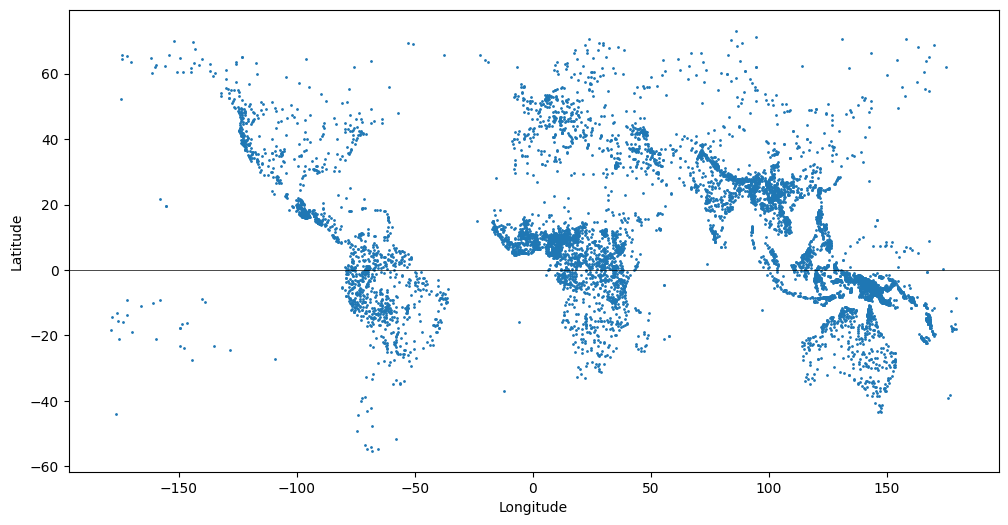

In [179]:
plt.figure(figsize=(12, 6)) # set the size of the plot (in inches)
plt.axhline(0, color='black', lw=0.5) # add the equator
plt.scatter(df_coord['longitude'], df_coord['latitude'], s=1) # plot the data (size of the points = 1)
plt.xlabel('Longitude') # set the label of the x-axis
plt.ylabel('Latitude') # set the label of the y-axis
plt.show() # show the plot

What can you tell from this plot already? Do you notice that some of the regions of the world are more densely populated with languages than others? We can also visualize this by plotting a density plot of the locations of the languages.

For this, we will be using the hexbin plot. The hexbin plot is created by dividing the space into hexagons and counting the number of points in each hexagon. This is a great way to visualize the density of points in a scatter plot.

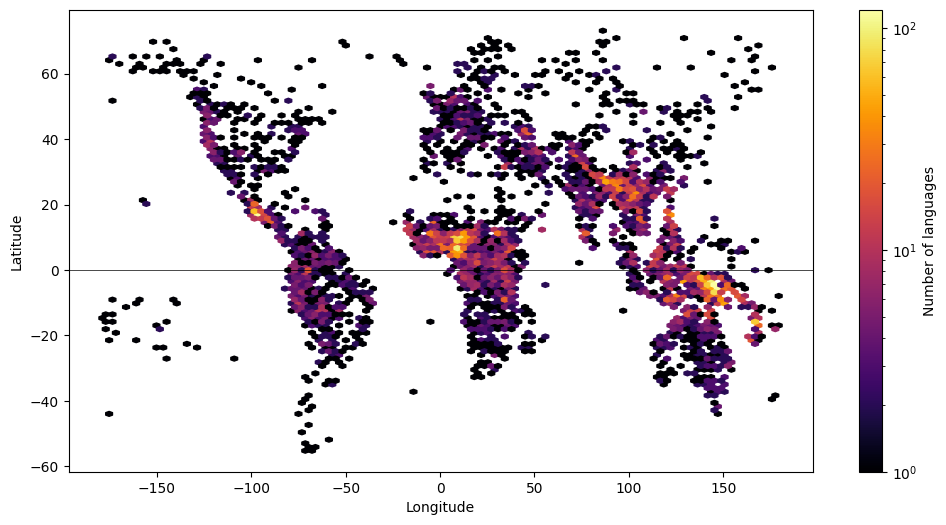

In [180]:
plt.figure(figsize=(12, 6)) # set the size of the plot (in inches)
plt.axhline(0, color='black', lw=0.5) # add the equator
plt.hexbin(x = df_coord['longitude'], # x-coordinate
           y = df_coord['latitude'], # y-coordinate
           gridsize=100, # number of bins
           bins='log', # logarithmic scale
           cmap='inferno', # colormap
           mincnt=1) # minimal count of points to color a bin = 1
plt.colorbar(label='Number of languages') # add a colorbar
plt.xlabel('Longitude') # set the label of the x-axis
plt.ylabel('Latitude') # set the label of the y-axis
plt.show() # show the plot

### 1.2. Map basics

Great, however, we are still missing a map of the world. Let's add a map of the world to our plot. We can use the `basemap` library to do this. This library allows us to have great basemaps for our plots, and is compatible with `matplotlib`.

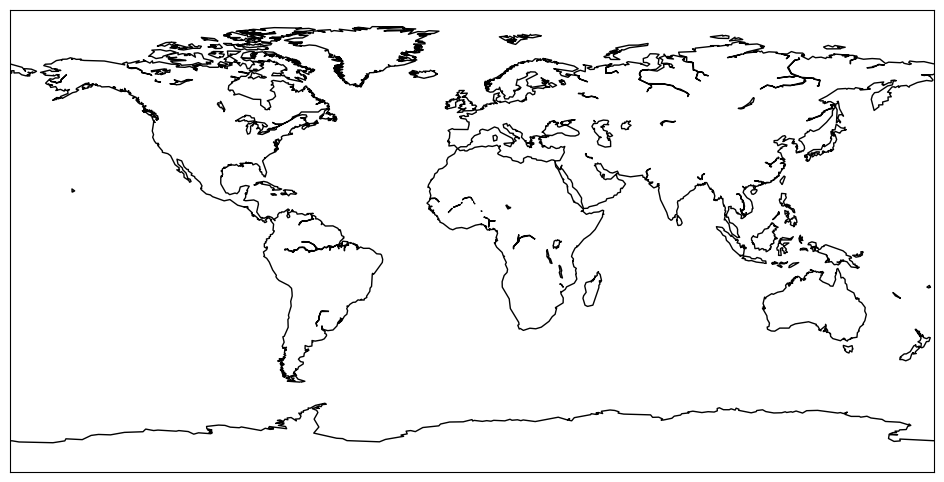

In [181]:
plt.figure(figsize=(12, 6)) # set the size of the plot (in inches)
m = Basemap(projection='cyl', # set the projection (we are using a cylindrical projection)
            lon_0=0, # set the center of the map
            resolution='c') # set the resolution (we are using 'crude', as we don't need a high resolution)
m.drawcoastlines(color='black') # draw the coastlines
plt.show() # show the plot

It would be nice to color the continents, let's update the plot to color the continents.

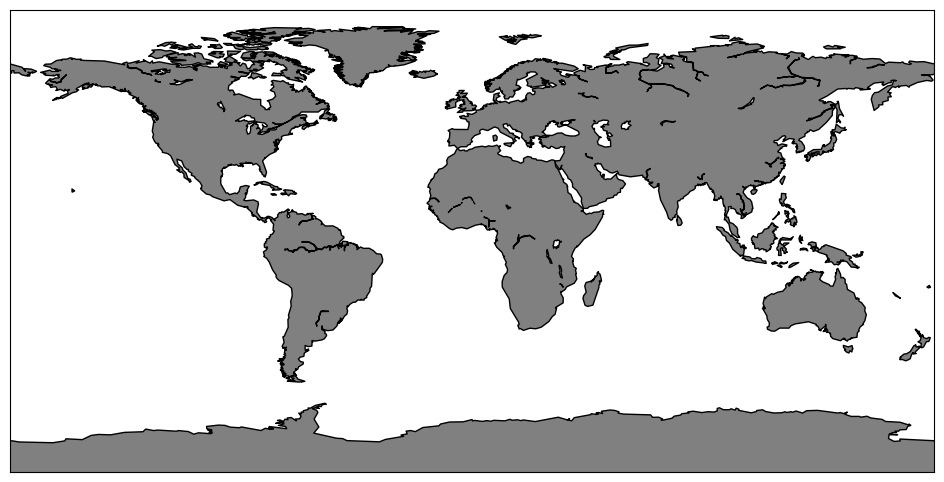

In [184]:
plt.figure(figsize=(12, 6)) # set the size of the plot (in inches)
m = Basemap(projection='cyl', # set the projection (we are using a cylindrical projection)
            lon_0=0, # set the center of the map
            resolution='c') # set the resolution (we are using 'crude', as we don't need a high resolution)
m.drawcoastlines(color='black') # draw the coastlines
m.fillcontinents(color='gray', # set the color of the continents
                 lake_color='white') # set the color of the water
plt.show()

Maps could have many different projections, such as the Mercator projection, the Robinson projection, or the Mollweide projection. You can see some examples of these projections below:

<img src='https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEikV_a3eFRALOvMNsGkE5gcHgSdw91pZDdPu8EkR-sJP9NYzR6lcbv-RrH67xEwosiWruacYndDnnR6yRExckZaj9oo1yI-_pBD_Wekhigzw_2yoGGUTdYMUaR9srvyuoEAGgRkiUDlyQxqxtBJBs5TfnHtMBSILE4P3Y5XS14bsjO6uIr16dmVZxmw5D85/s1920/InShot_20240506_185350804.jpg' alt="drawing" width="500" >

We can also change the projection by using the `projection` parameter in the `Basemap` function. Let's change the projection to `robin` (Robinson) and see how the plot changes.

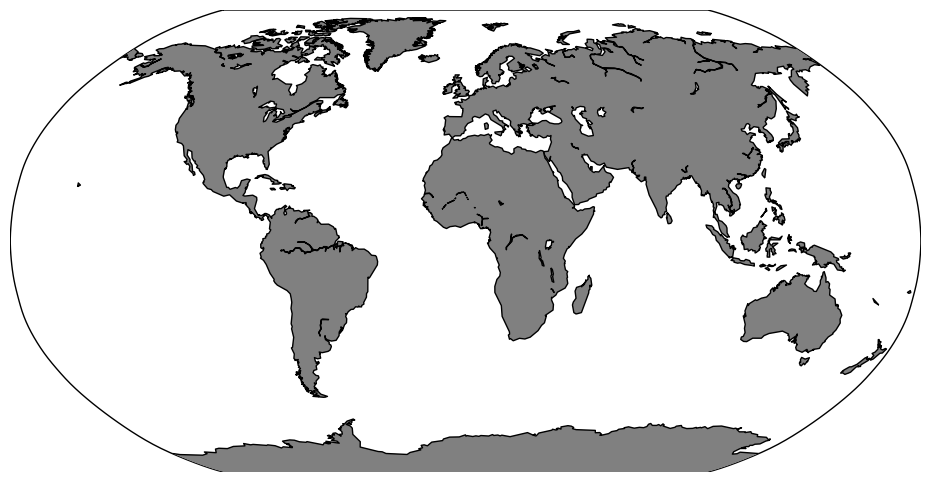

In [185]:
plt.figure(figsize=(12, 6)) 
m = Basemap(projection='robin', # you can change the projection here
            lat_0=0, lon_0=0, 
            resolution='c') 
m.drawcoastlines(color='black') 
m.fillcontinents(color='gray', 
                 lake_color='white') 
plt.show()

Let's try another projection, the Mollweide projection. Let's change the projection to `moll` and see how the plot changes. You can also find the full list of projections in the [documentation](https://matplotlib.org/basemap/stable/users/mapsetup.html).

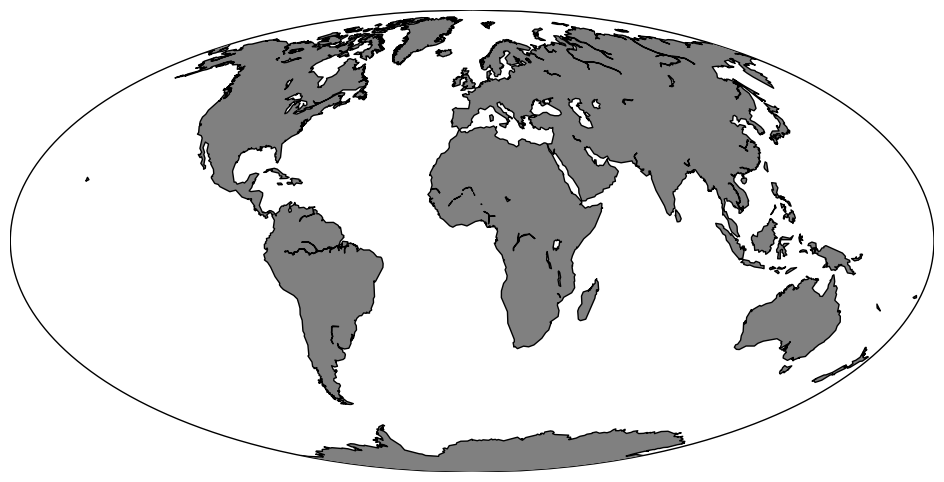

In [145]:
plt.figure(figsize=(12, 6)) 
m = Basemap(projection='moll', # you can change the projection here
            lat_0=0, lon_0=0, 
            resolution='c') 
m.drawcoastlines(color='black') 
m.fillcontinents(color='gray', 
                 lake_color='white') 
plt.show()

### 1.3. Putting it all together.

Now that we have a map of the world, let's add the scatter plot of the languages on top of it. We can do this by either using `matplotlib` or `basemap` directly. Let's use `basemap` directly to plot the languages on top of the map.

First, let's define x and y coordinates of our languages:

In [198]:
x_all = df_coord['longitude'].values
y_all = df_coord['latitude'].values

Then we can plot them on top of the map. Let's also make the map more transparent by adjusting the `alpha` parameter of the `fillcontinents` method:

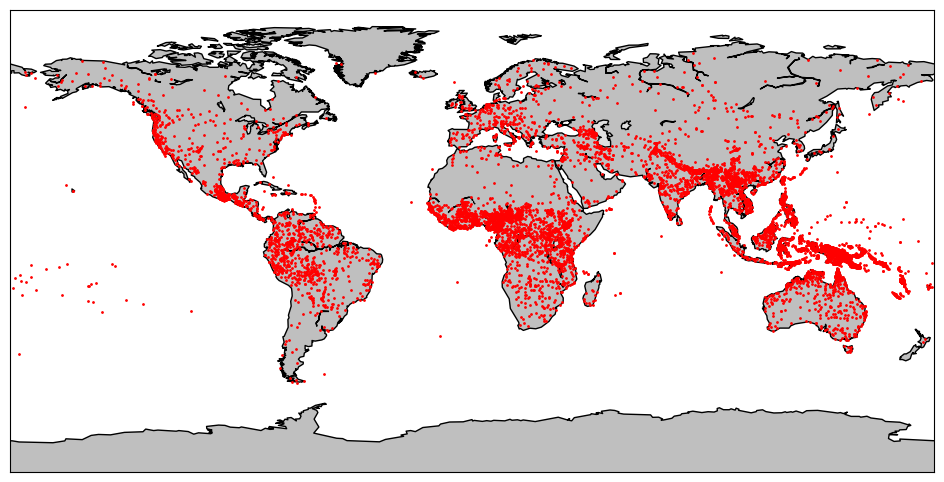

In [199]:
plt.figure(figsize=(12, 6)) 
m = Basemap(projection='cyl', 
            lat_0=0, 
            lon_0=0, 
            resolution='c') 
m.drawcoastlines(color='black') 
m.fillcontinents(color='gray', 
                 lake_color='white', 
                 alpha=0.5) # set the transparency of the continents to make the points more visible
# Plotting the languages
m.plot(x_all, y_all, 'ro', markersize=1)
plt.show()

Let's try another projection:

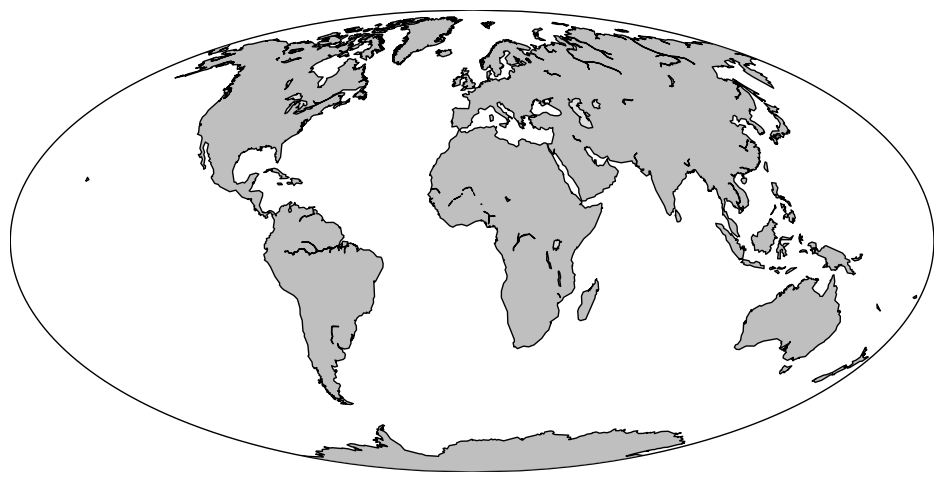

In [204]:
plt.figure(figsize=(12, 6)) 
m = Basemap(projection='moll', # you can change the projection here
            lat_0=0, 
            lon_0=0, 
            resolution='c') 
m.drawcoastlines(color='black') 
m.fillcontinents(color='gray', 
                 lake_color='white', 
                 alpha=0.5) # set the transparency of the continents to make the points more visible
m.plot(x_all, y_all, 'ro', markersize=1) # Plotting the languages
plt.show()

Ooops, something seems wrong here! We cannot see the points, because we need to adapt the longitude and latitude values to the projection. Let's do this by using the `Basemap` object.

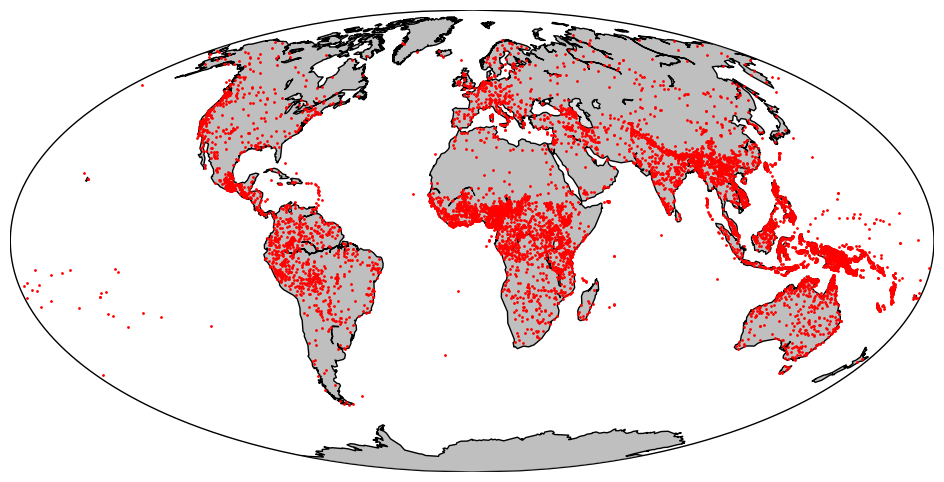

In [205]:
plt.figure(figsize=(12, 6)) 
m = Basemap(projection='moll', 
            lat_0=0, 
            lon_0=0, 
            resolution='c') 
m.drawcoastlines(color='black') 
m.fillcontinents(color='gray', 
                 lake_color='white', 
                 alpha=0.5) # set the transparency of the continents to make the points more visible
new_x, new_y = m(x_all, y_all) # convert the coordinates to the map coordinates
# Plotting the languages
m.plot(new_x, new_y, 'ro', markersize=1)
plt.show()

We can also add the hexbin plot on top of the map. Let's do this by using the `hexbin` method of the `Basemap` object.

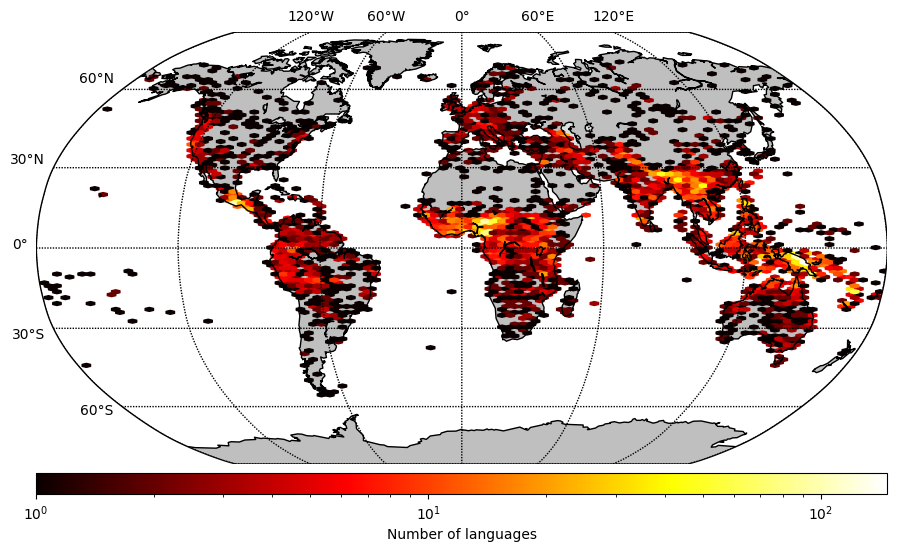

In [232]:
plt.figure(figsize=(12, 6)) 
m = Basemap(projection='robin', 
            lat_0=0, 
            lon_0=0, 
            resolution='c') 
m.drawcoastlines(color='black') 
m.fillcontinents(color='gray', 
                 lake_color='white', 
                 alpha=0.5) # set the transparency of the continents to make the points more visible
new_x, new_y = m(x_all, y_all) # convert the coordinates to the map coordinates
# Plotting the languages as a hexbin plot
m.hexbin(x=new_x, 
         y=new_y, 
         gridsize=100, # set the number of bins
         bins='log', # log scale for the number of languages
         cmap='hot') # set the color map
m.colorbar(label='Number of languages', # set the label of the colorbar
           location='bottom') # set the location of the colorbar
# Plot parallels and meridians
m.drawparallels(np.arange(-90., 120., 30.), labels=[1, 0, 0, 0]) # the list in the labels parameter sets the visibility of the labels (left, right, top, bottom)
m.drawmeridians(np.arange(0., 420., 60.), labels=[0, 0, 1, 0])
plt.show()

### 1.4. Exploring the linguistic diversity relative to the equator

We have plotted the linguistic diversity on a map. If you look at the map, you can see that the linguistic diversity is not evenly distributed across the world. Some regions have more languages than others, like the Sub-Saharan Africa region, or the South-East Asia region. While other regions have fewer languages, like the Arctic region or the Sahara desert. 

One thing that we can look at, is the density of languages relative to the equator. We can do this by plotting the latitude of the languages against the number of languages at that latitude. First, we need to group the languages by latitude and count the number of languages at each latitude. Then we can plot the number of languages at each latitude.

**Before we start doing this, do you have any hypotheses about the distribution of languages relative to the equator? Will there be more languages above or below the equator? Why?**

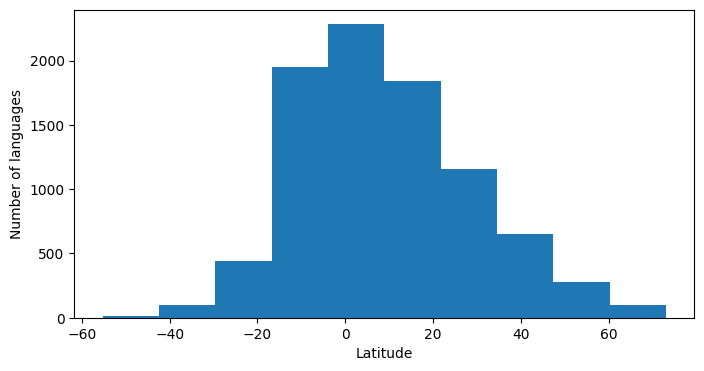

In [235]:
plt.figure(figsize=(8, 4))
plt.hist(df_coord['latitude'], # latitude values
         ) 
plt.xlabel('Latitude') # set the label of the x-axis
plt.ylabel('Number of languages')
plt.show()

Nice, but it's not very pretty, and also not very informative. Let's make a better plot by adjusting the number of bins and the color of the plot.

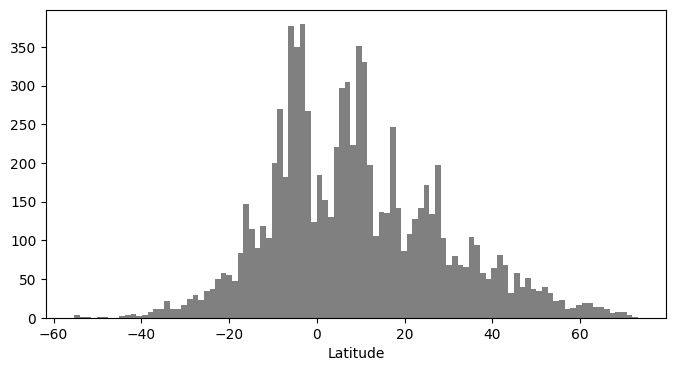

In [236]:
plt.figure(figsize=(8, 4))
plt.hist(df_coord['latitude'], # latitude values
         bins=100,
         color='grey') 
plt.xlabel('Latitude') # set the label of the x-axis
plt.show()

Let's also add a line to the equator, and center the x-axis at the equator.

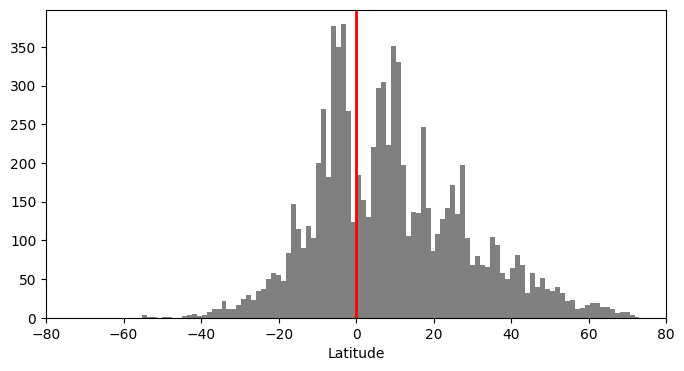

In [241]:
plt.figure(figsize=(8, 4))
plt.hist(df_coord['latitude'], # latitude values
         bins=100,
         color='grey') 
plt.xlabel('Latitude') # set the label of the x-axis
plt.axvline(x=0, color='red', lw=2) # add the equator
plt.xlim(-80, 80)
plt.show()

Let's also label the left side as below the equator and the right side as above the equator.

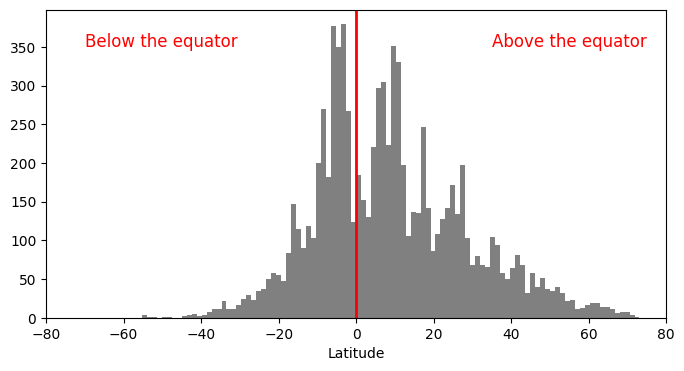

In [252]:
plt.figure(figsize=(8, 4))
plt.hist(df_coord['latitude'], # latitude values
         bins=100,
         color='grey') 
plt.xlabel('Latitude') # set the label of the x-axis
plt.axvline(x=0, color='red', lw=2) # add the equator
plt.xlim(-80, 80)
plt.text(-70, 350, 'Below the equator', fontsize=12, color='red') # add a text
plt.text(35, 350, 'Above the equator', fontsize=12, color='red') # add a text
plt.show()

It seems that there are indeed more languages above the equator than below, let's now try to count below and above the equator. Note that the latitude above the equator is positive, and below the equator is negative.

In [260]:
above = df_coord[df_coord['latitude'] > 0].shape[0] # number of languages above the equator
print(f'Number of languages above the equator: {above}')

Number of languages above the equator: 5529


In [261]:
below = df_coord[df_coord['latitude'] < 0].shape[0] # number of languages below the equator
print(f'Number of languages below the equator: {below}')

Number of languages below the equator: 3284


There is indeed more languages above the equator than below. This is interesting, as it shows that the linguistic diversity is not evenly distributed across the world. However, it might be due to the Earth having more landmass above the equator than below. We can also show it using a bar plot.

In [266]:
df_coord['equator_relative'] = np.where(df_coord['latitude'] > 0, 'Above', 'Below') # add a new column

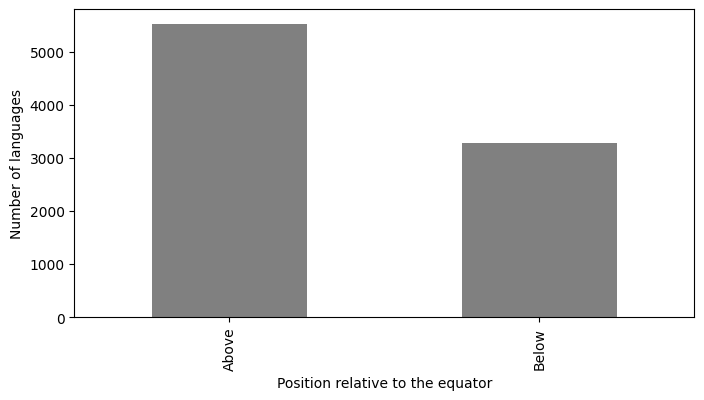

In [267]:
plt.figure(figsize=(8, 4))
df_coord['equator_relative'].value_counts().plot(kind='bar', color='grey') # plot the counts of the values
plt.ylabel('Number of languages') # set the label of the y-axis
plt.xlabel('Position relative to the equator') # set the label of the x-axis
plt.show()

### 1.5. Plotting a specific region

Let's now focus on one specific region, and look at France, for example. We can do this by setting the limits of the map to the region we are interested in.

In [194]:
# the window is [41, 51, -5, 10], only choosing the languages in this window
df_window = df_coord[(df_coord['latitude'] >= 41) & (df_coord['latitude'] <= 51) \
                     & (df_coord['longitude'] >= -5) & (df_coord['longitude'] <= 10)]

In [195]:
# remove names where there are numbers or the word "sign"
df_window = df_window[~df_window['name'].str.contains(r'\d|sign', case=False)]

In [196]:
names = df_window['name'].values.tolist()
x = df_window['longitude'].values
y = df_window['latitude'].values

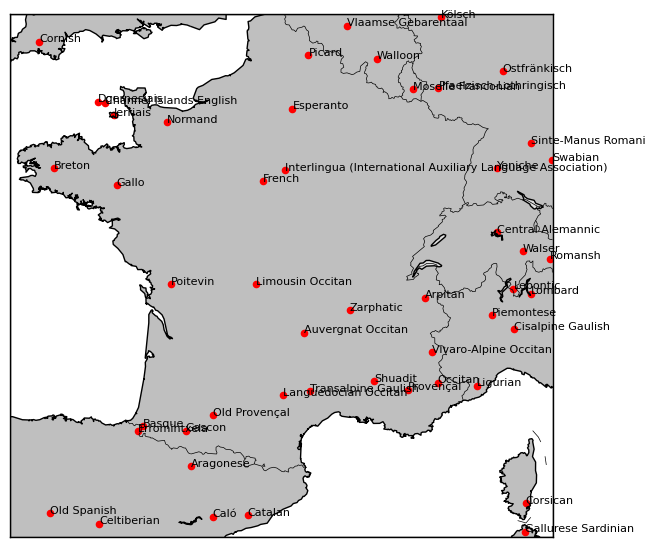

In [197]:
plt.figure(figsize=(7, 7))
# plot the map of France
m = Basemap(projection='merc',
            llcrnrlat=41,
            urcrnrlat=51,
            llcrnrlon=-5,
            urcrnrlon=10,
            lat_ts=20, 
            resolution='i')
m.drawcoastlines()
m.drawcountries()
m.drawmapboundary()
m.fillcontinents(color='grey',
                 lake_color='white',
                 alpha=0.5)
x_new, y_new = m(x, y)
# m.plot(x_new, y_new, 'ro', markersize=5)
plt.scatter(x_new, y_new, s=20, c='red', alpha=1)
for i, name in enumerate(names):
    plt.text(x_new[i], y_new[i], name, fontsize=8, ha='left')
plt.show()

## 2. Predicting linguistic diversity

In his book Linguistic Diversity (1999), Daniel Nettle hypothesizes that linguistic diversity is predicted by the fertility of the land. To test this hypothesis, he collected data from 74 countries, and measured the linguistic diversity of each country by counting the number of languages spoken in each country. He also measured the fertility of the land by counting the number of months in which crops can be grown in each country (MGS, mean growing season).

Let's take a look at the data first.

In [155]:
data_nettle = pd.read_csv('https://raw.githubusercontent.com/bodowinter/applied_statistics_book_data/master/nettle_1999_climate.csv') # NB: this is a link to a CSV file
data_nettle.head(10)

,Country,Population,Area,MGS,Langs
0,Algeria,4.41,6.38,6.60,18
1,Angola,4.01,6.10,6.22,42
2,Australia,4.24,6.89,6.00,234
3,Bangladesh,5.07,5.16,7.40,37
4,Benin,3.69,5.05,7.14,52
5,Bolivia,3.88,6.04,6.92,38
6,Botswana,3.13,5.76,4.60,27
7,Brazil,5.19,6.93,9.71,209
8,Burkina Faso,3.97,5.44,5.17,75
9,CAR,3.50,5.79,8.08,94


Let's count the number of countries in the data.

In [156]:
data_nettle.Country.unique().shape

(74,)

Min, max and median values of the mean growing season:

In [157]:
print(f'Minimum MGS: {data_nettle.MGS.min()}')
print(f'Maximum MGS: {data_nettle.MGS.max()}')
print(f'Median MGS: {data_nettle.MGS.median()}')

Minimum MGS: 0.0
Maximum MGS: 12.0
Median MGS: 7.355


Same for population size:

In [158]:
print(f"Min population: {data_nettle.Population.min()}")
print(f"Max population: {data_nettle.Population.max()}")
print(f"Median population: {data_nettle.Population.median()}")

Min population: 2.01
Max population: 5.93
Median population: 3.99


Why do these values seem a bit off? Because the raw population size (in number of people) was transformed into a $log_{10}$ scale. Let's transform it back to the original scale by taking the exponent of the values.

In [159]:
data_nettle['Population_exp'] = 10**data_nettle['Population']

Australia's population in the 2000s was arund 17 million people. So as you can see, the population size was initially recorder in 1000ths of people.

In [160]:
data_nettle[data_nettle.Country == 'Australia']

,Country,Population,Area,MGS,Langs,Population_exp
2,Australia,4.24,6.89,6.0,234,17378.008287


Let's plot the number of languages (stored in the column `Langs`) against the log-transformed population size (stored in the column `Population`). What are your predictions? Do you think there is a correlation between the number of languages spoken in a country and its population size?

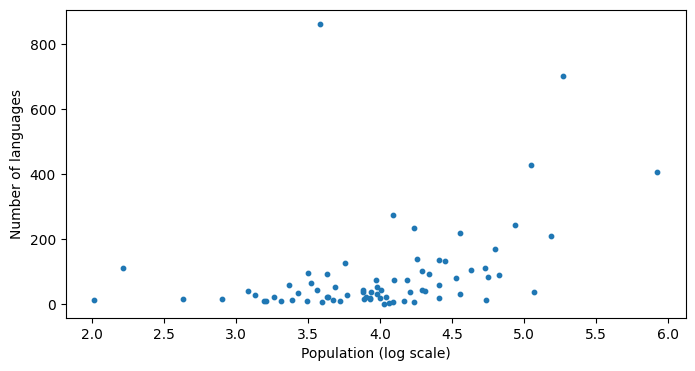

In [161]:
plt.figure(figsize=(8, 4))
plt.scatter(data_nettle['Population'], data_nettle['Langs'], s=10)
plt.xlabel('Population (log scale)')
plt.ylabel('Number of languages')
plt.show()

Let's compute the correlation between the number of languages and the population size. We can do this by using the `corrcoef` function from the `numpy` library.

In [162]:
np.corrcoef(data_nettle['Population'], data_nettle['Langs'])[0, 1]

0.37664126884066096

<Axes: xlabel='MGS', ylabel='Langs'>

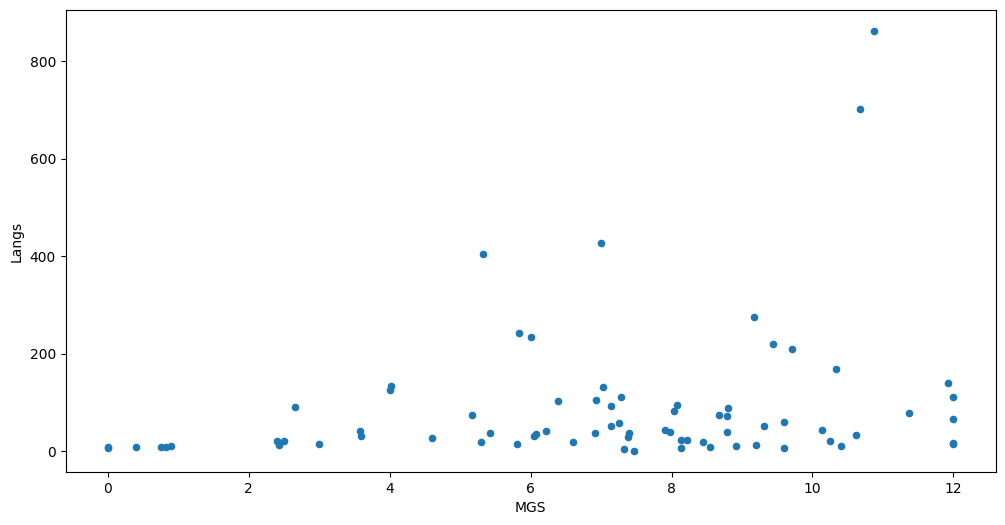

In [163]:
data_nettle.plot.scatter(x='MGS', y='Langs', figsize=(12, 6))